# External modules

In [4]:
library(tidyverse)
library(readr)
library(DescTools)

# Internal functions

In [5]:

path <- ".."

xfun::in_dir(dir = path, expr = source("./src/impute_outliers.R"))
xfun::in_dir(dir = path, expr = source("./src/extract_nlargest_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/get_standard_scaled_data.R"))
xfun::in_dir(dir = path, expr = source("./src/get_one_hot_encoded_data.R"))
xfun::in_dir(dir = path, expr = source("./src/get_one_hot_encoded_and_standard_scaled_data.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_modes.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_modes.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_gev_mixture_model_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/fit_gev_mixture_model.R"))
xfun::in_dir(dir = path, expr = source("./src/fit_unimodal_gev_mixture_model.R"))
xfun::in_dir(dir = path, expr = source("./src/fit_ns_gev_mixture_model.R"))
xfun::in_dir(dir = path, expr = source("./src/fit_unimodal_ns_gev_mixture_model.R"))

xfun::in_dir(dir = path, expr = source("./src/plot_fit_gev_mixture_model.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_fit_ns_gev_mixture_model.R"))

xfun::in_dir(dir = path, expr = source("./src/get_ns_gev_model_parameters.R"))
xfun::in_dir(dir = path, expr = source("./src/get_full_ns_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/get_full_ns_gev_mixture_model_cdf.R"))


Loading required package: lattice


Attaching package: ‘caret’


The following objects are masked from ‘package:DescTools’:

    MAE, RMSE


The following object is masked from ‘package:purrr’:

    lift




In [6]:
options(repr.plot.width=19, repr.plot.height=12)

# Complete dataset

In [7]:
data <- xfun::in_dir(dir = path, expr = read_csv("./applications/final_dataset.csv"))

Rows: 22847 Columns: 59
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl (59): timestamp, latitude, longitude, velocity_latitude, velocity_longit...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [8]:
str(data)

spc_tbl_ [22,847 × 59] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ timestamp             : num [1:22847] 17207386 17241310 17274219 17308103 17343083 ...
 $ latitude              : num [1:22847] 48.8 48.8 48.8 48.8 48.8 ...
 $ longitude             : num [1:22847] 2.46 2.46 2.46 2.46 2.46 ...
 $ velocity_latitude     : num [1:22847] NA -4.91e-11 -3.82e-11 -3.73e-11 -4.86e-11 ...
 $ velocity_longitude    : num [1:22847] NA 9.48e-12 7.09e-12 6.72e-12 8.41e-12 ...
 $ velocity              : num [1:22847] NA 5.00e-11 3.89e-11 3.79e-11 4.93e-11 ...
 $ lateral_error         : num [1:22847] -0.589 -0.571 -0.566 -0.56 -0.592 ...
 $ longitudinal_error    : num [1:22847] 0.0639 0.0775 0.0832 0.0979 0.1043 ...
 $ haversine_error       : num [1:22847] 0.592 0.576 0.572 0.569 0.6 ...
 $ latitude_error        : num [1:22847] 4.91e-06 4.77e-06 4.73e-06 5.57e-06 4.96e-06 ...
 $ longitude_error       : num [1:22847] -1.22e-07 1.33e-07 2.49e-07 3.92e-07 5.62e-07 ...
 $ heading_error         : num [1:2284

# Impute outliers

In [9]:
x_raw <- data$lateral_error_abs

In [10]:
coefficient_iqr <- 9
method <- c("interpolate", "mode", "median", "mean")[1]

In [11]:
x_raw_object <- impute_outliers(x = x_raw, coefficient_iqr = coefficient_iqr, method = method)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [12]:
print(names(x_raw_object))

[1] "outlier_values"      "outlier_positions"   "outlier_substitutes"
[4] "method"              "coefficient_iqr"     "imputed_data"       
[7] "raw_data"           


In [13]:
outlier_positions <- x_raw_object$outlier_positions

In [14]:
print(outlier_positions)

  [1]  2348  2349  2350  2351  2352  2353  2354  2355  2356  2357  2358  2359
 [13]  2360  2361  2362  2363  2364  2365  2366  2367  2368  2369  2370  2371
 [25]  2372  2373  2374  2375  2376  2377  2378  2379  2380  2381  2382  2383
 [37]  2384  2385  2386  2387  2388  2389  2390  2391  2392  2393  2394  2395
 [49]  2396  4811  4812  4813  4814  4815  4816  4817  4818  4819  4820  4821
 [61]  4822  4823  4824  4825  4826  4827  4828  4829 16605 16606 16607 16608
 [73] 16609 16610 16611 16612 16613 16614 16615 16616 16617 16618 16619 16620
 [85] 16621 16622 16623 16624 16625 16626 16627 16628 16629 16630 16631 16632
 [97] 16633 16634 16635 16636 16637 16638 16639 16640 16641 16642 16643 16644
[109] 16645 16646 16647 16648 16649 16650 16651 16652 16653 16654 16655 18392
[121] 18393 18394 18395 18396 18397 18398 18399 18400 18401 18402 18403 18404
[133] 18405 18406 18407 18408 18409 18410 18411 18412 18417 18418 18419 18420
[145] 18421 18422 18423 18424 18425 18426 18427 18428 18429 1843

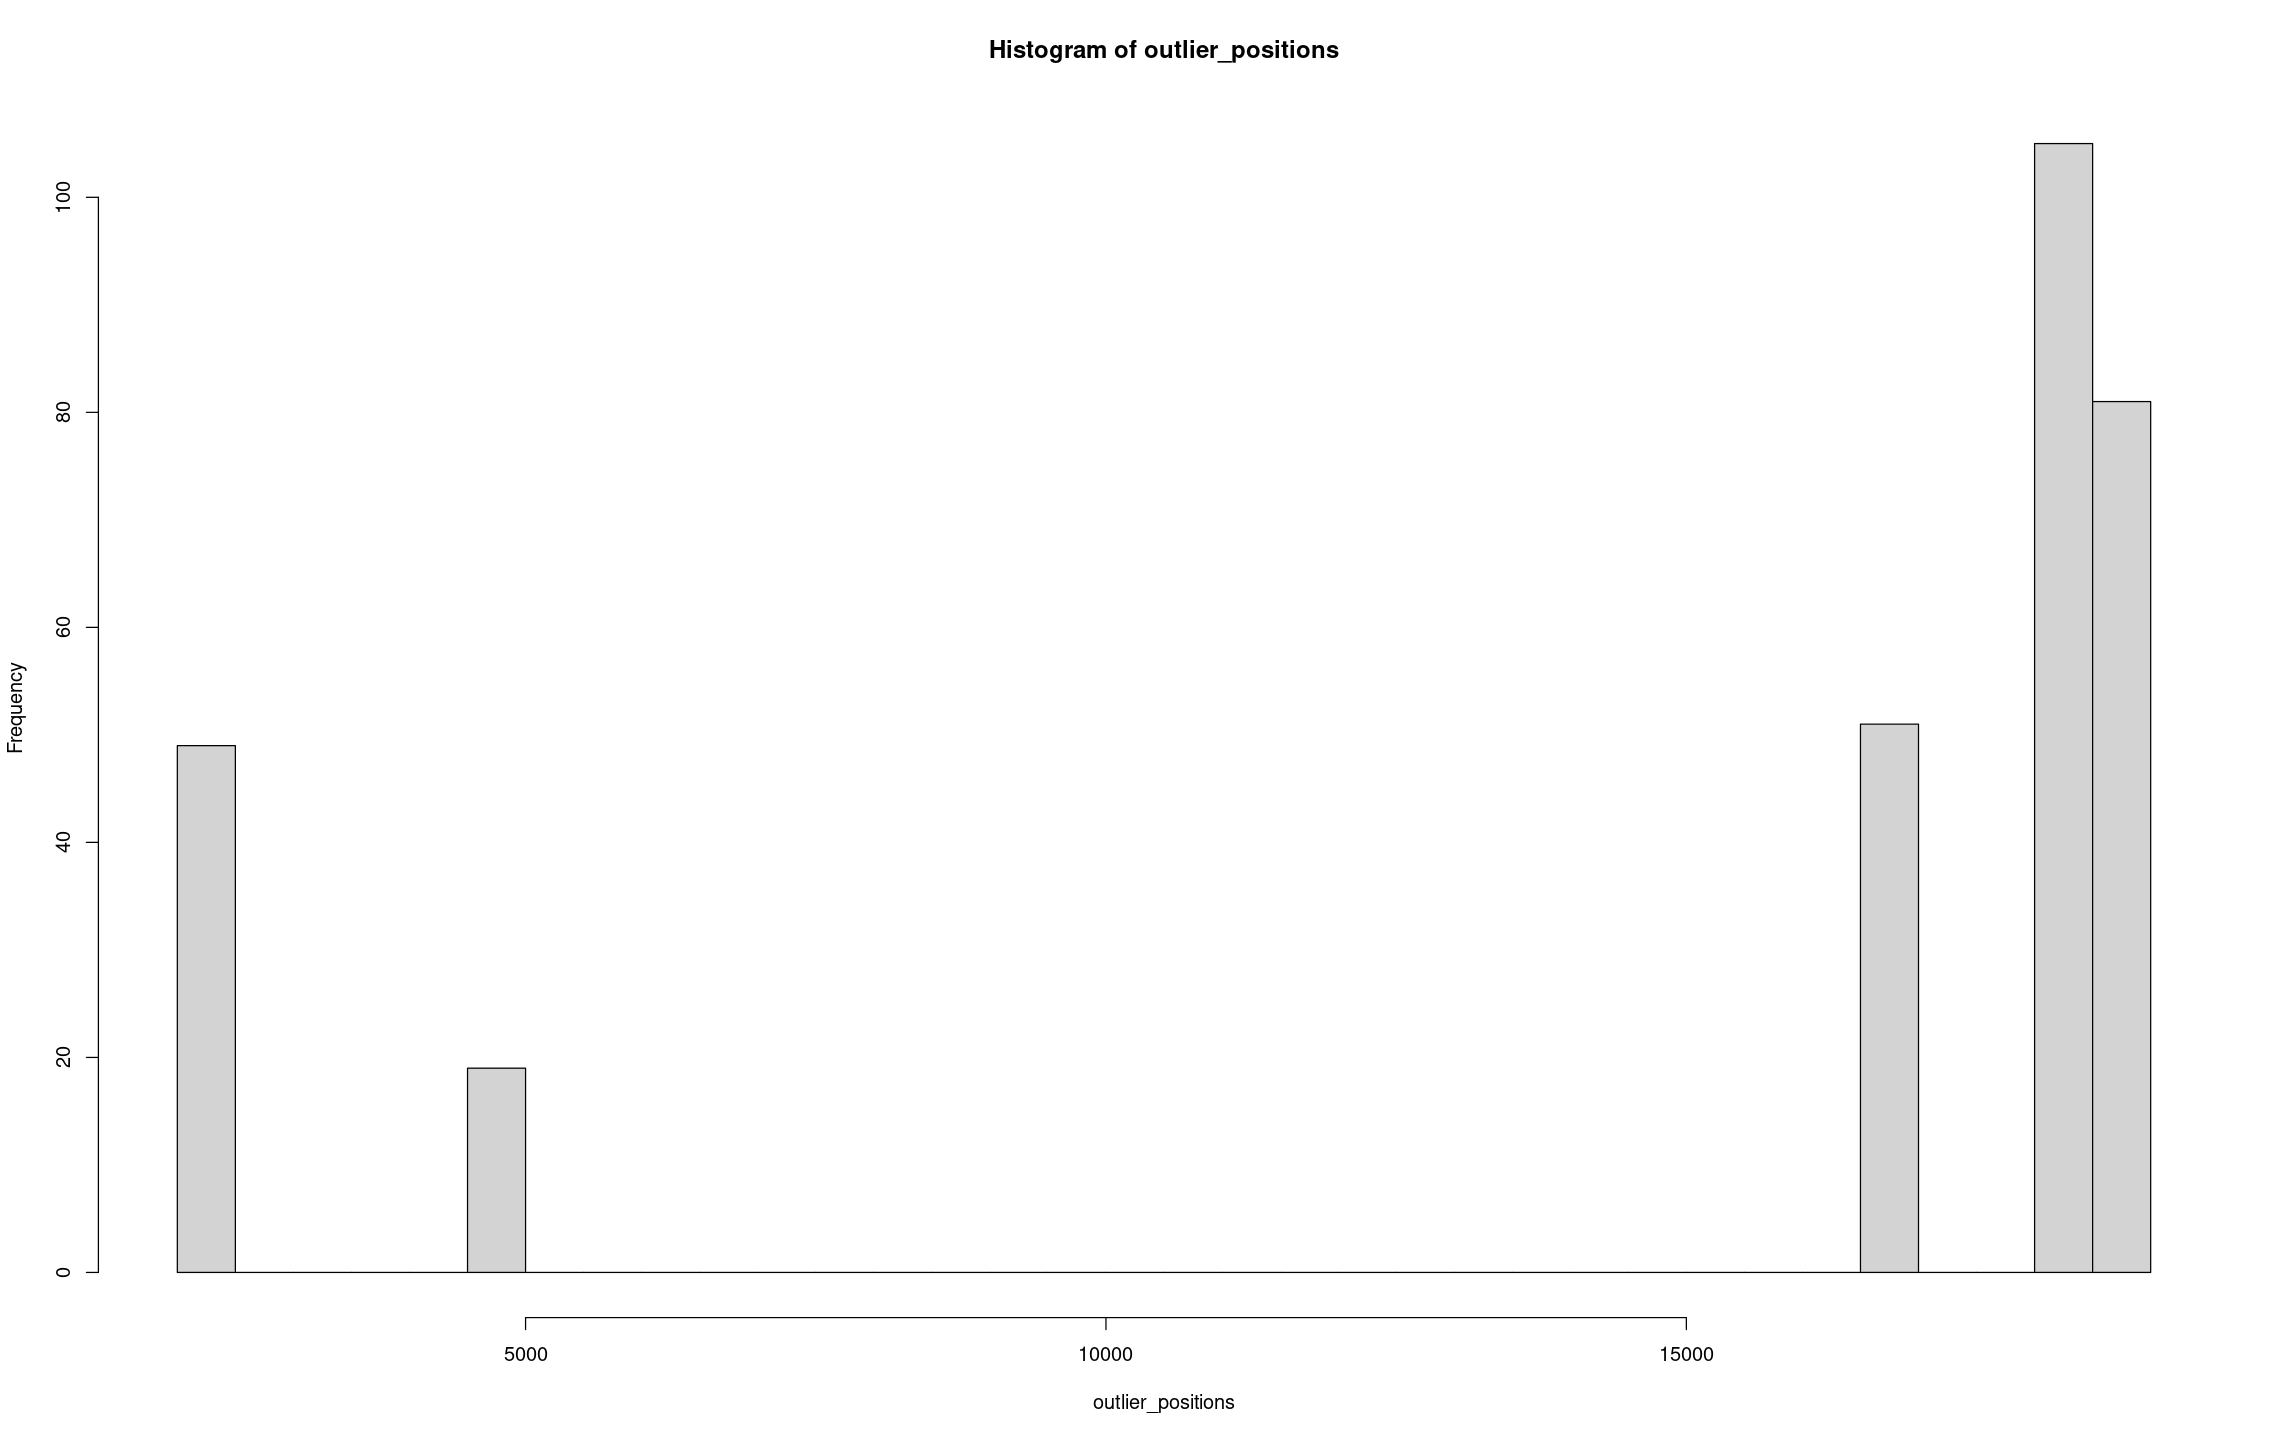

In [15]:
hist(outlier_positions, nclass = 50)

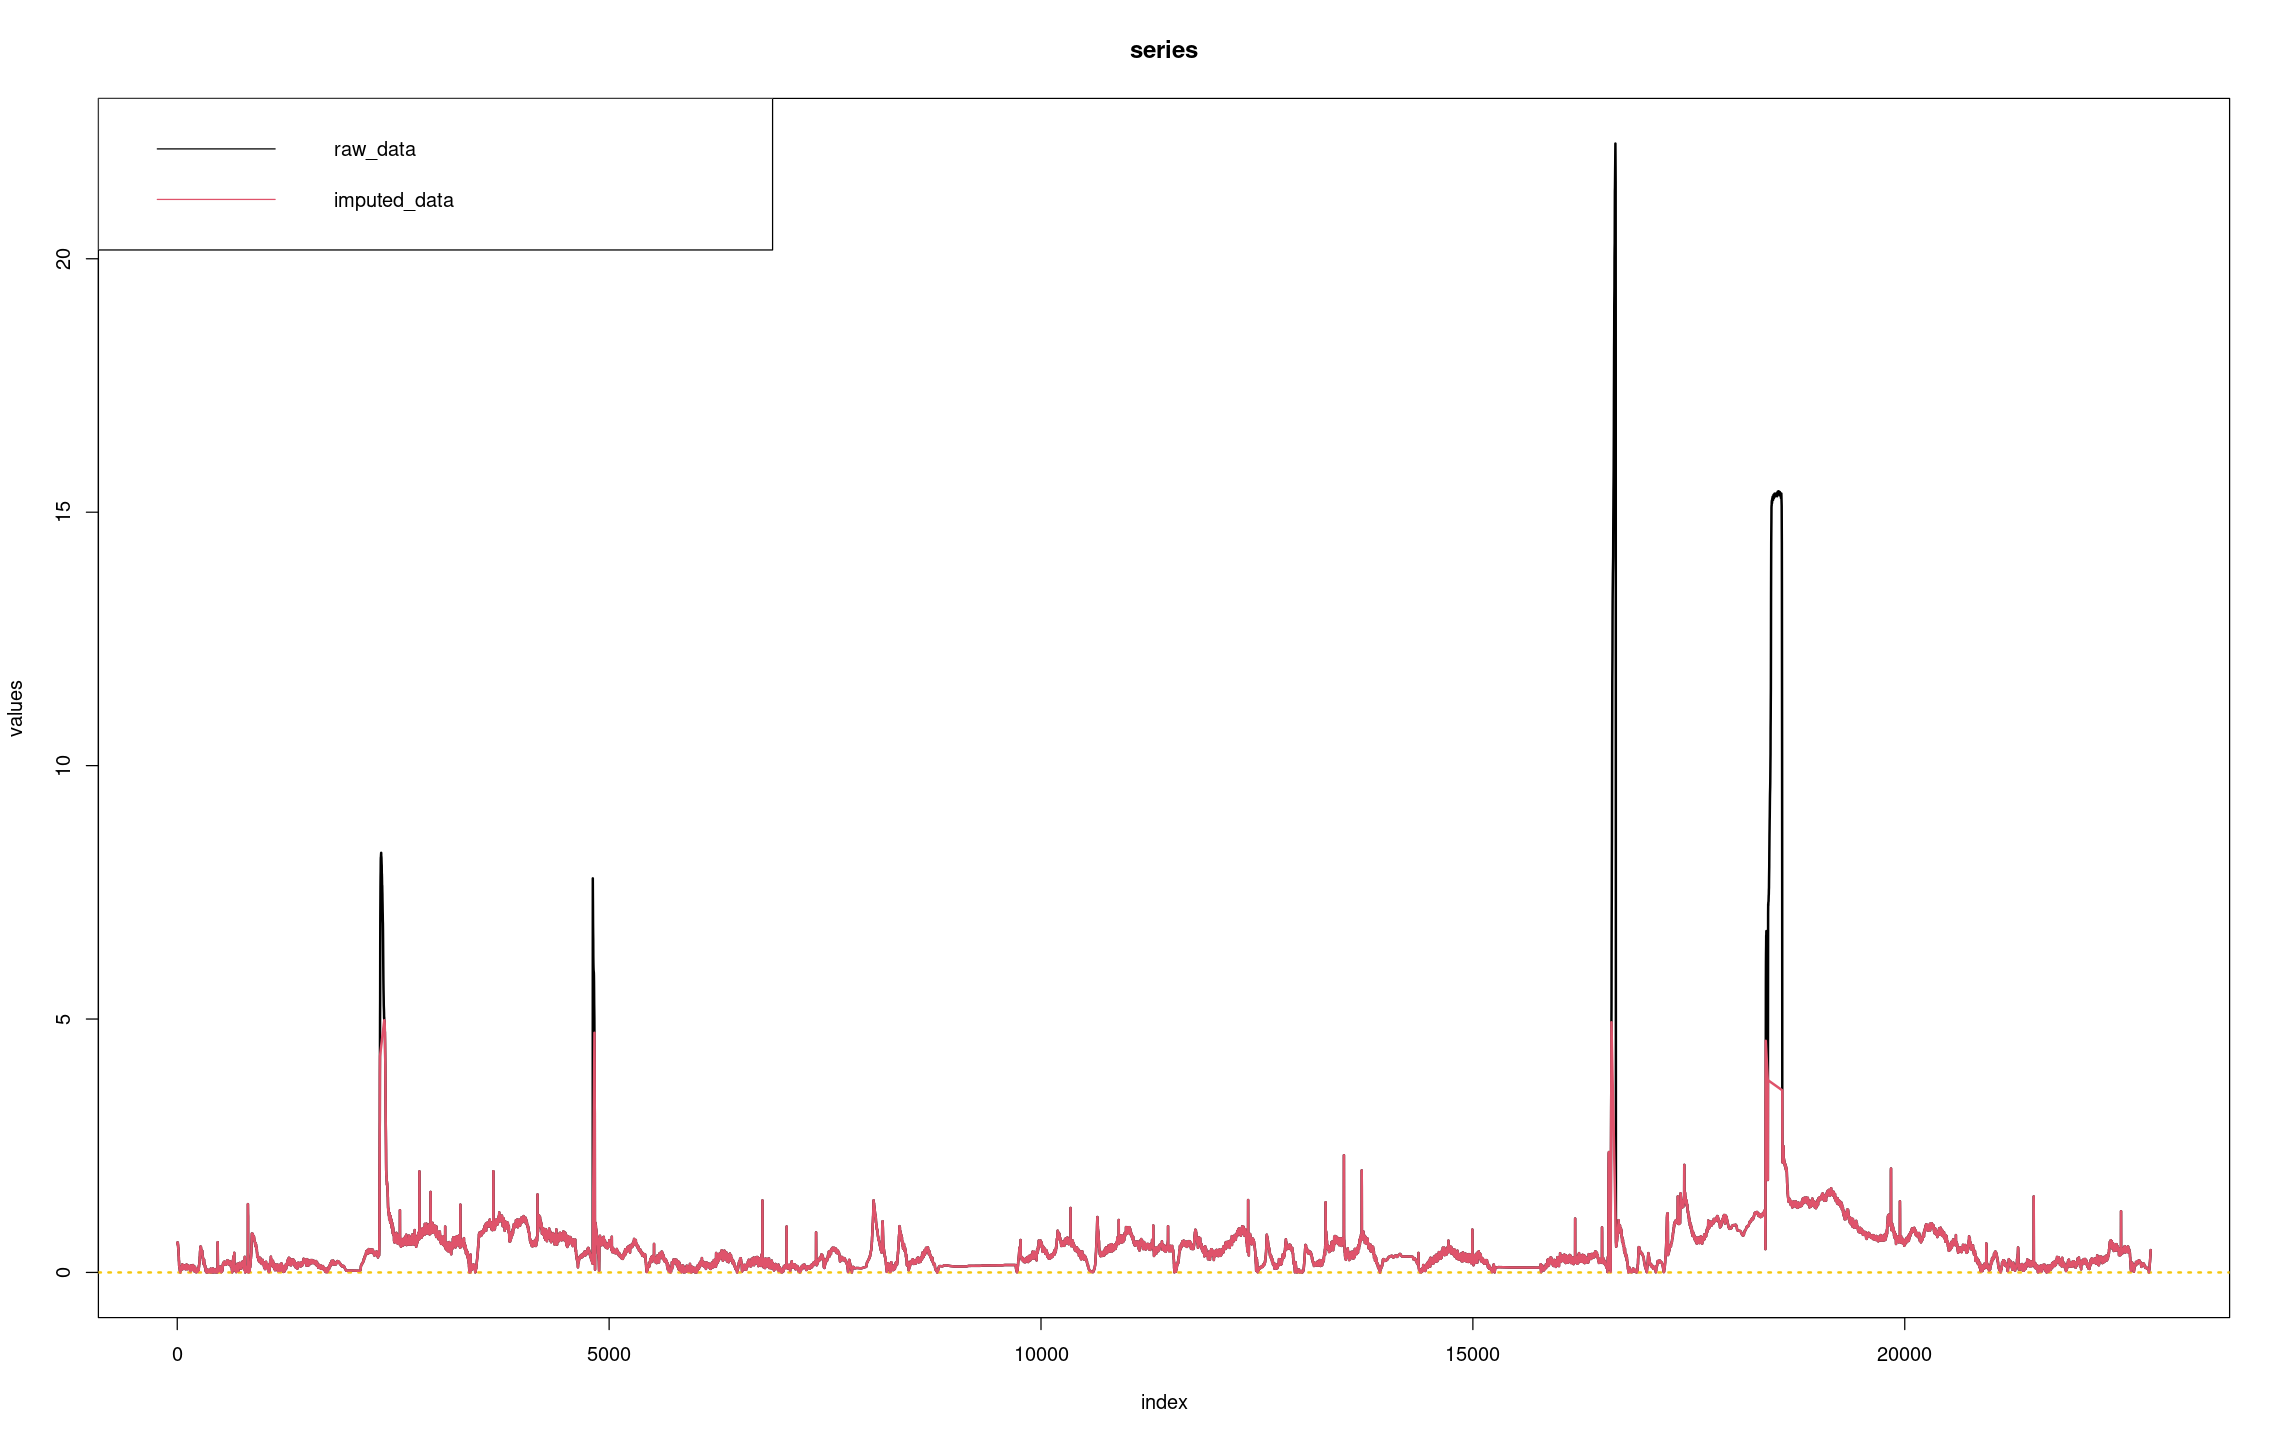

In [16]:
plot(x_raw_object$raw_data, 
     type = "l", 
     lwd = 2, 
     ylab = "values", 
     xlab = "index",
    main = "series")
abline(h = 0, lty = "dotted", col = 7, lwd = 2)
lines(x_raw_object$imputed_data, col = 2, lwd = 2)
legend("topleft", legend = c("raw_data", "imputed_data"), col = c(1, 2), lty = 1:1, cex = 1)

In [17]:
# data with imputed outliers
x_with_imputed_outliers <- x_raw_object$imputed_data 

In [18]:
# data with removed outliers
x_with_removed_outliers <- x_raw[-outlier_positions]
data_clean <- data[-outlier_positions, ]

# Data description

In [19]:
x <- x_with_imputed_outliers
#x <- x_with_removed_outliers

------------------------------------------------------------------------------ 
x (numeric)

           length                n              NAs           unique'
           22'847           22'847                0           22'581
                            100.0%             0.0%                 
                                                                    
              .05              .10              .25           median
  0.0481907140464  0.0872328415513  0.1457234174015  0.3255223631860
                                                                    
            range               sd            vcoef              mad
  4.9767084120450  0.5421689620294  1.1428336973211  0.3094048471886
                                                                    
               0s             mean            meanCI
                0  0.4744075741731   0.4673769940670
             0.0%                    0.4814381542791
                                                    
    

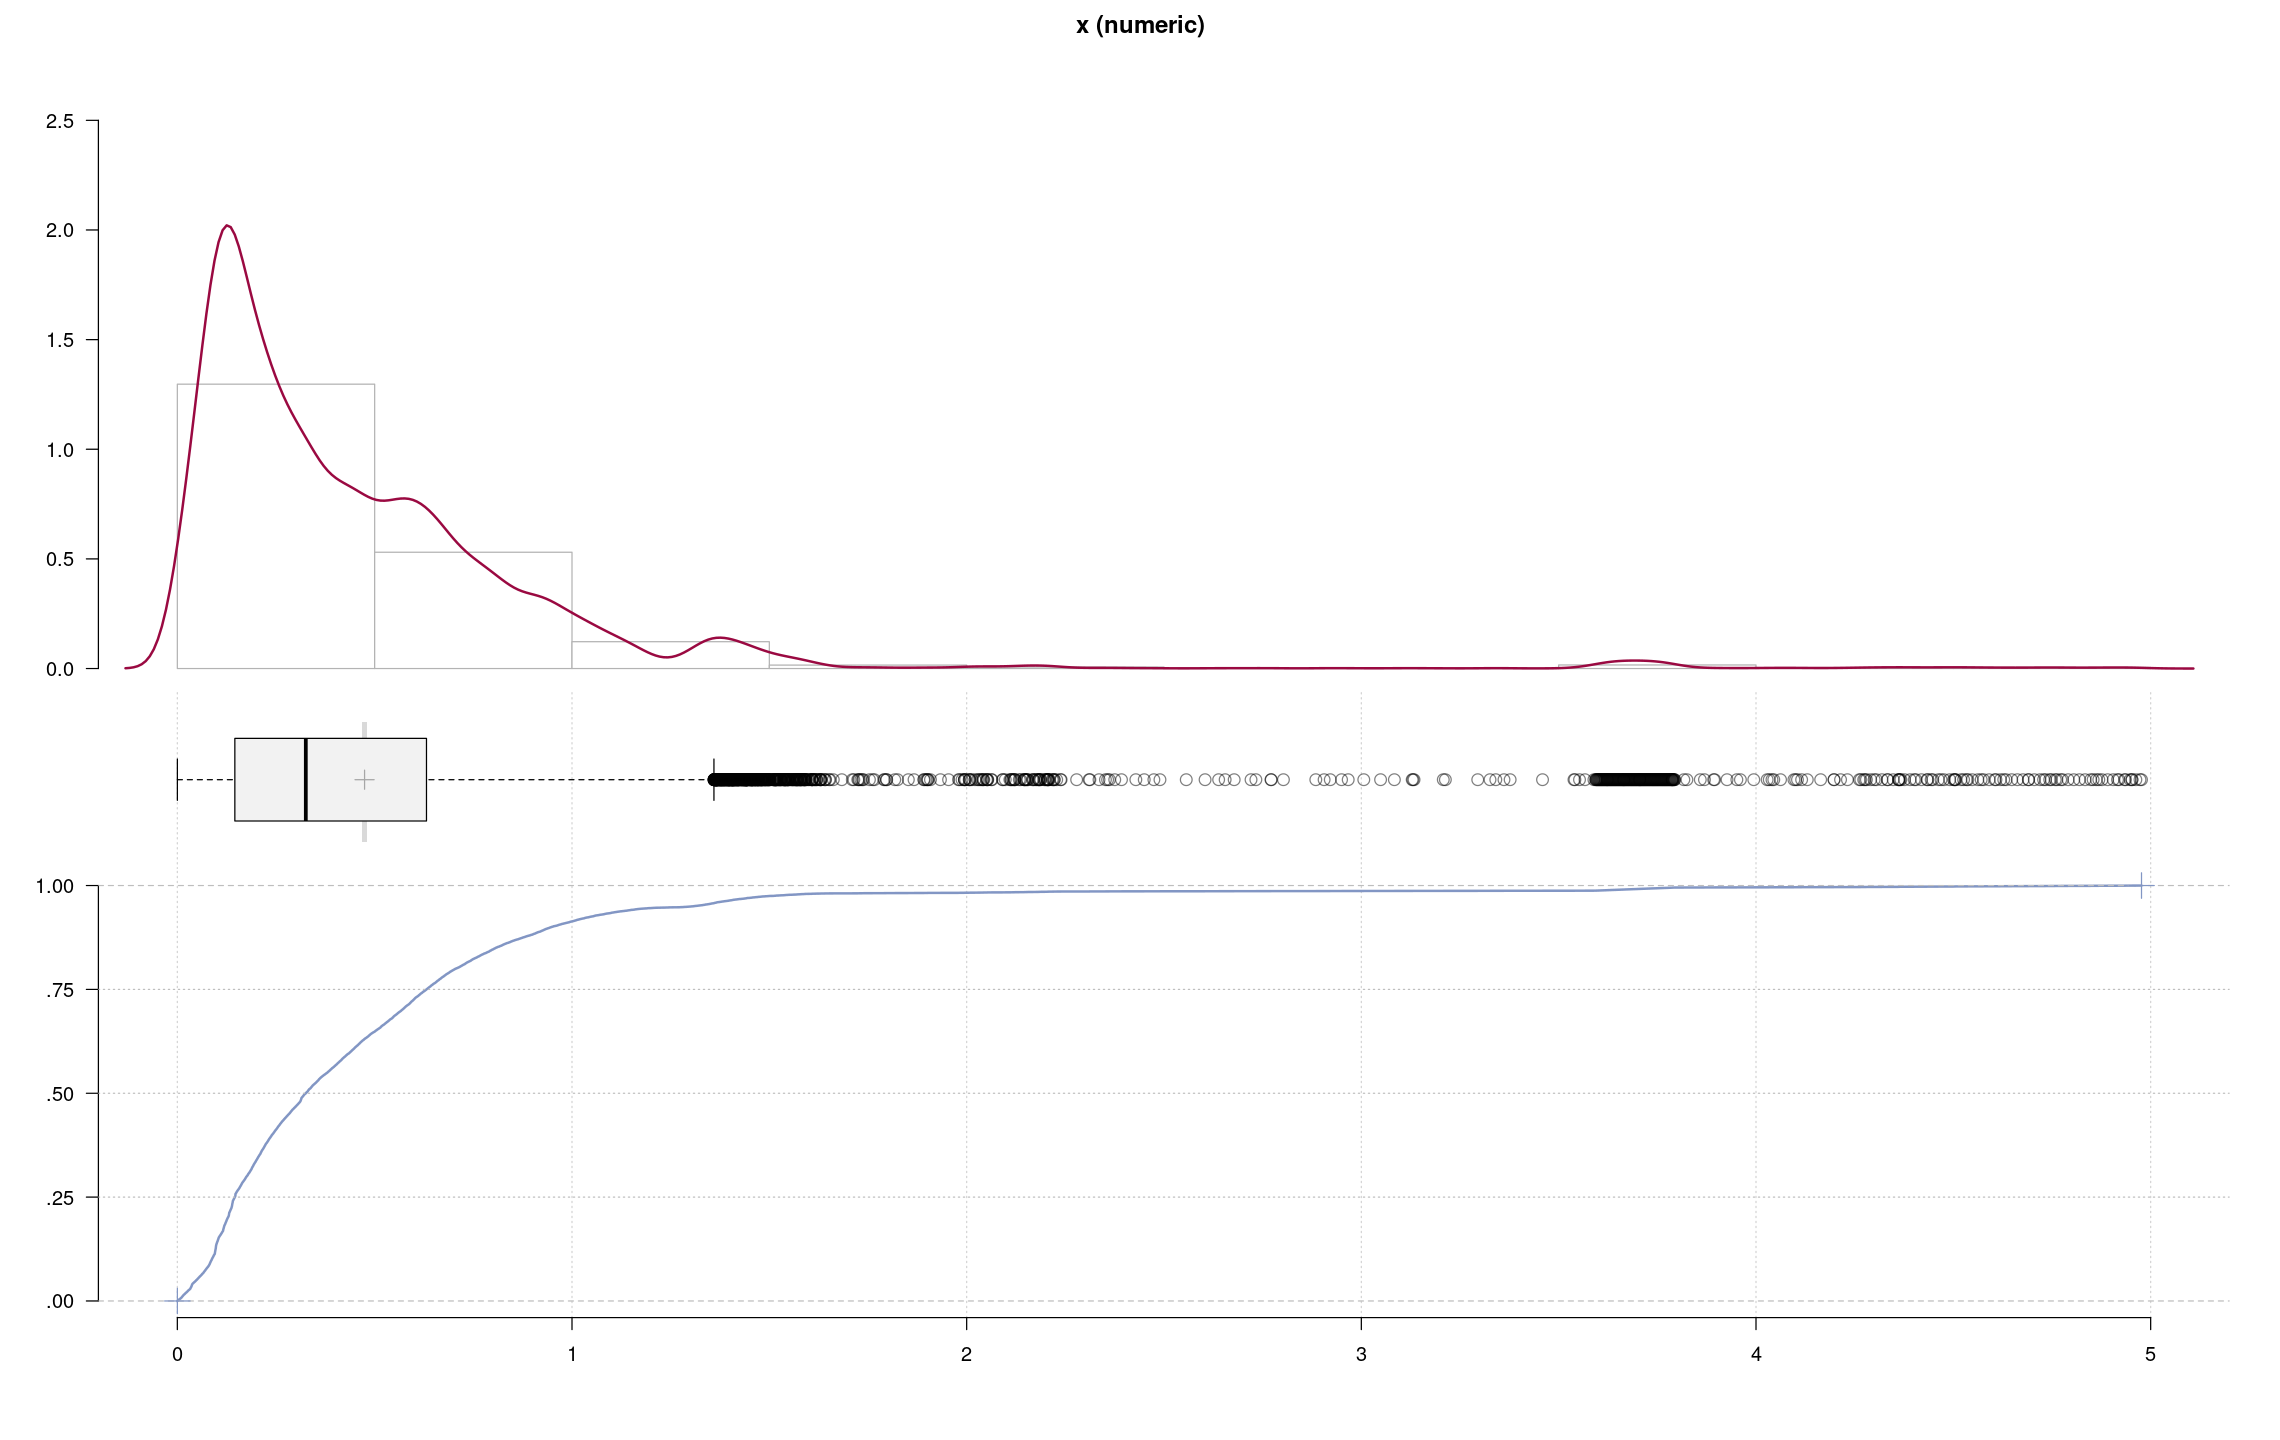

In [20]:
Desc(x)

In [21]:
#nlargest <- 2000
#y <- extract_nlargest_sample(x, n = nlargest)
#Desc(y)

# EVA: Stationary case

## Estimation

In [22]:
modes_object <- calculate_modes(x = x)

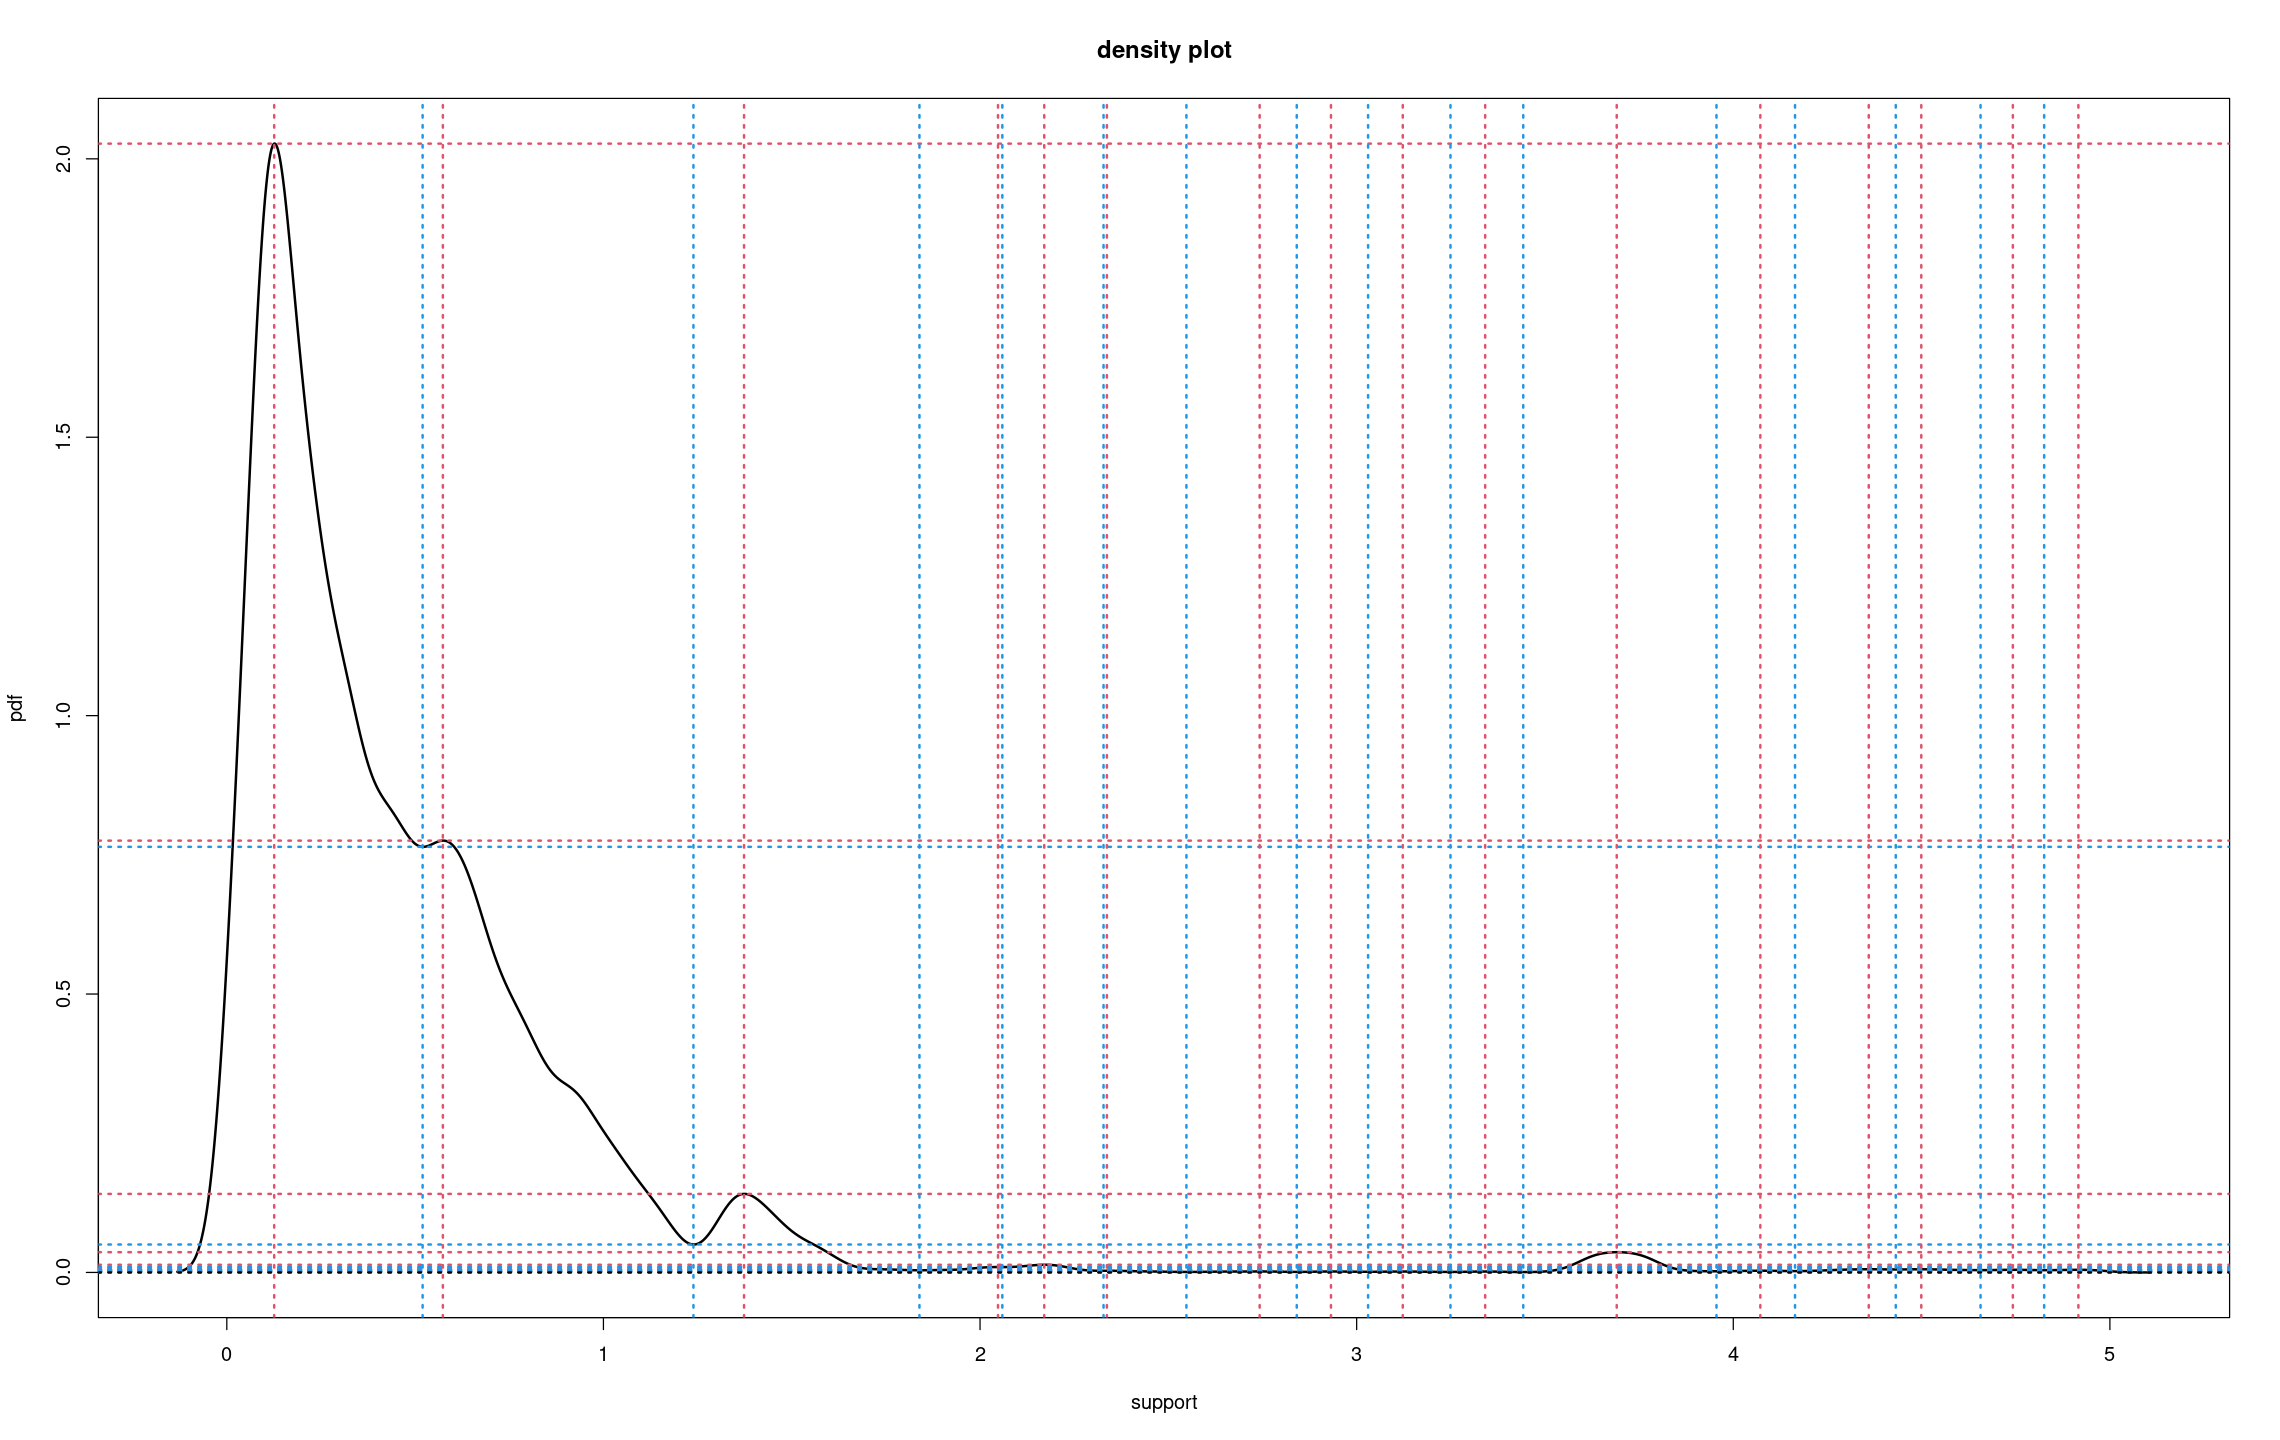

In [23]:
plot_modes(modes_object)

In [47]:
p <- 3

gev_mixture_model <- fit_unimodal_gev_mixture_model(x = x,
                                 nb_gev_models = p,
                                 min_cluster_size = 20,
                                 max_iteration = 40,
                                 left_cluster_extension_size = 20,
                                 right_cluster_extension_size = 20,
                                 tolerance = 10^(-3))


[1] "Iteration: 2, Tolerance: 22.4867125918572"
[1] "Iteration: 3, Tolerance: 21.4046950649135"
[1] "Iteration: 4, Tolerance: 16.9633373247998"
[1] "Iteration: 5, Tolerance: 9.35646168620224"
[1] "Iteration: 6, Tolerance: 5.29127214514665"
[1] "Iteration: 7, Tolerance: 1.18256307573756"
[1] "Iteration: 8, Tolerance: 1.85052874764733"
[1] "Iteration: 9, Tolerance: 3.84085023355146"
[1] "Iteration: 10, Tolerance: 4.85022228916932"
[1] "Iteration: 11, Tolerance: 5.61824792872358"
[1] "Iteration: 12, Tolerance: 7.10396154657428"
[1] "Iteration: 13, Tolerance: 7.17836622723189"
[1] "Iteration: 14, Tolerance: 8.31534740506686"
[1] "Iteration: 15, Tolerance: 8.80830339473323"
[1] "Iteration: 16, Tolerance: 10.47744809285"
[1] "Iteration: 17, Tolerance: 10.0845677899524"
[1] "Iteration: 18, Tolerance: 8.12303536883701"
[1] "Iteration: 19, Tolerance: 10.0697390012683"
[1] "Iteration: 20, Tolerance: 13.4426242203117"
[1] "Iteration: 21, Tolerance: 15.3157355967087"
[1] "Iteration: 22, Tolerance:

In [48]:
print(names(gev_mixture_model))

 [1] "last_iteration"                  "last_tolerance"                 
 [3] "nclusters"                       "cluster_sizes"                  
 [5] "cluster_weights"                 "cluster_negative_loglikelihoods"
 [7] "information_criterions"          "cluster_gev_model_parameters"   
 [9] "clusters"                        "data"                           
[11] "cluster_models"                 


## Parameters

In [49]:
print(gev_mixture_model$nclusters)

[1] 3


In [50]:
print(gev_mixture_model$cluster_sizes)

   1    2    3 
9261 4283 9303 


In [51]:
print(gev_mixture_model$information_criterions)

         AIC          BIC 
-35432.07986 -35359.75068 


In [52]:
print(gev_mixture_model$cluster_gev_model_parameters)

                   [,1]           [,2]         [,3]
location  0.11071149427  0.31051483341 0.6123716960
scale     0.06427851984  0.05141109745 0.1818235908
shape    -0.39109406833 -0.25832099555 0.5400874485


In [53]:
print(gev_mixture_model$cluster_weights)

[1] 0.4053486235 0.1874644373 0.4071869392


## Diagnostic

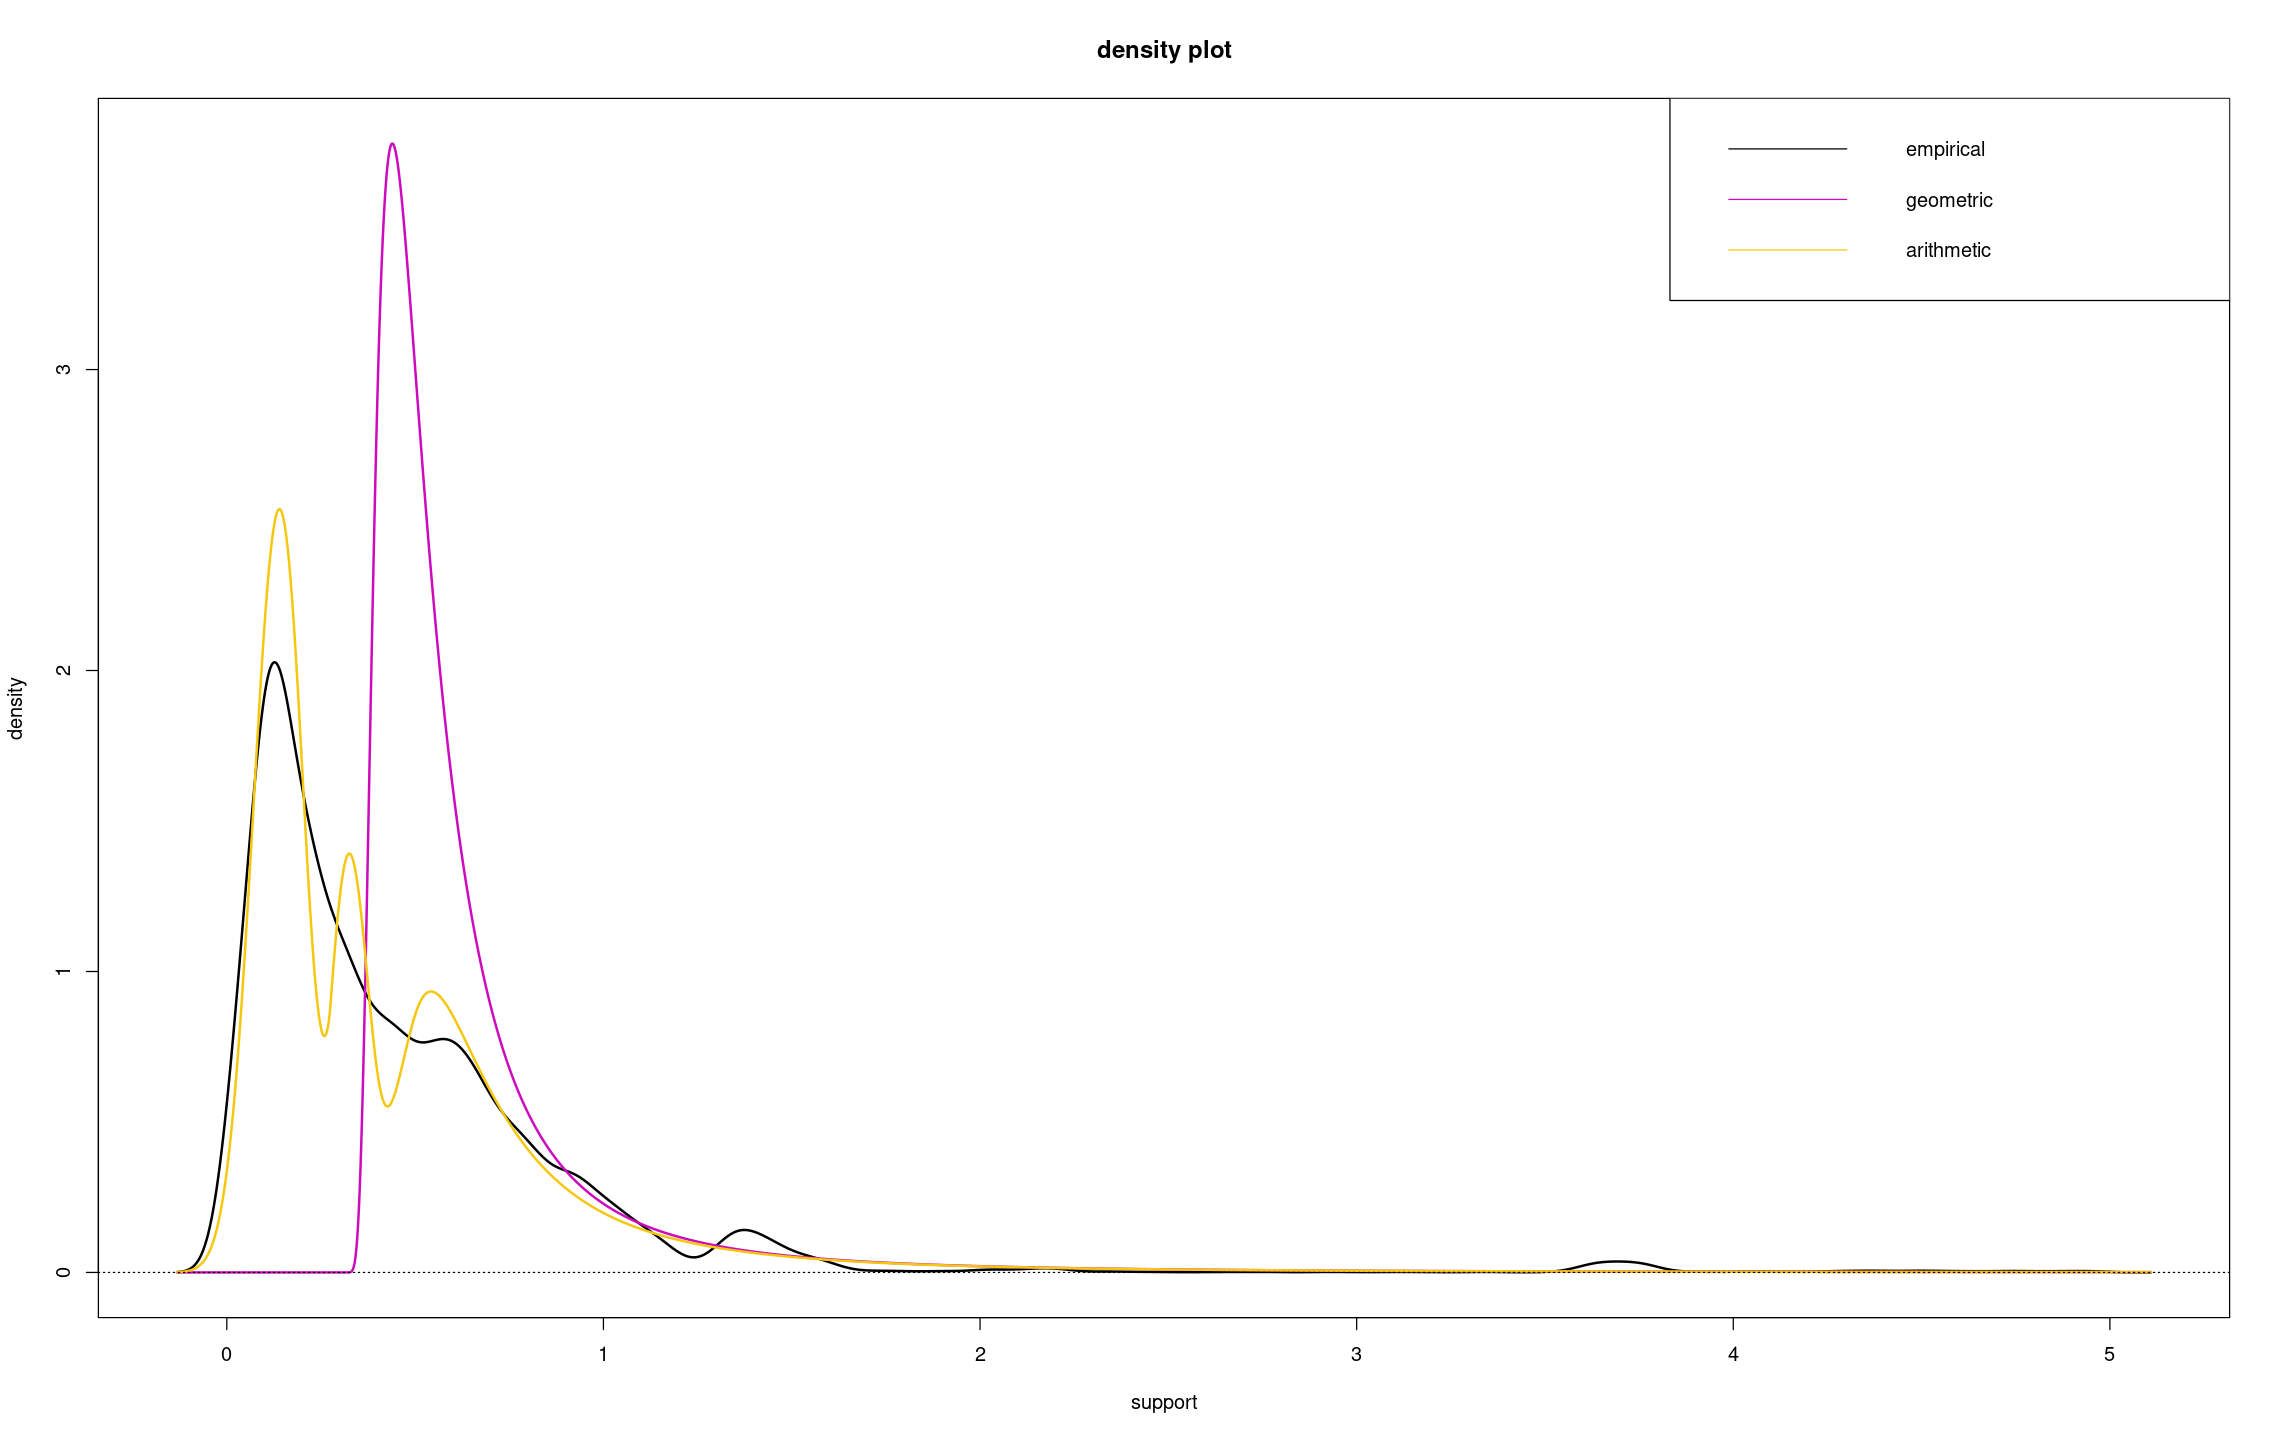

In [54]:
plot_fit_gev_mixture_model(gev_mixture_model)

## Quantiles

In [55]:
parameters <- gev_mixture_model$cluster_gev_model_parameters

weights <- gev_mixture_model$cluster_weights

In [56]:
alpha <- 10^(-14)

In [57]:
rl_geometric <- calculate_gev_mixture_model_inverse_cdf(p = 1 - alpha,
                                                   locations = parameters["location", ],
                                                   scales = parameters["scale", ],
                                                   shapes = parameters["shape", ],
                                                   weights = weights,
                                                   iterations = 100,
                                                   kind = c("geometric", "arithmetic")[1])

print(rl_geometric)

[1] 7521359.78


In [35]:
rl_arithmetic <- calculate_gev_mixture_model_inverse_cdf(p = 1 - alpha,
                                                   locations = parameters["location", ],
                                                   scales = parameters["scale", ],
                                                   shapes = parameters["shape", ],
                                                   weights = weights,
                                                   iterations = 100,
                                                   kind = c("geometric", "arithmetic")[2])

print(rl_arithmetic)

[1] 1394612.675


# EVA: Non-stationary case

In [58]:
print(names(data))

 [1] "timestamp"              "latitude"               "longitude"             
 [4] "velocity_latitude"      "velocity_longitude"     "velocity"              
 [7] "lateral_error"          "longitudinal_error"     "haversine_error"       
[10] "latitude_error"         "longitude_error"        "heading_error"         
[13] "lateral_error_abs"      "longitudinal_error_abs" "haversine_error_abs"   
[16] "latitude_error_abs"     "longitude_error_abs"    "heading_error_abs"     
[19] "area"                   "object"                 "name_airplane"         
[22] "name_bench"             "name_bench..group."     "name_bicycle"          
[25] "name_bird"              "name_bird..group."      "name_boat"             
[28] "name_bus"               "name_car"               "name_car..group."      
[31] "name_dog"               "name_electric.pole"     "name_fence"            
[34] "name_fire.hydrant"      "name_gas.station"       "name_helicopter"       
[37] "name_house"             "name_hous

In [59]:
data_covariates <- data %>% select(velocity_latitude, velocity_longitude, velocity, area, object)
data_covariates <- na.omit(data_covariates)

In [60]:
data_covariates_scaled <- get_standard_scaled_data(data_covariates, newdata = NULL)

In [61]:
tail(data_covariates_scaled)

,velocity_latitude,velocity_longitude,velocity,area,object
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
22841,-0.0332972023137,0.0054694369619,-1.589693733,-0.9672426335,-1.480725888
22842,-0.0202230892048,0.0027034272771,-1.603080366,-1.0645264504,-1.391592846
22843,-0.0159199408558,0.0019702178001,-1.607376525,-0.8648414191,-1.213326760
22844,-0.0180557717010,0.0028553583001,-1.604914428,-0.9448906157,-1.213326760
22845,-0.0048148967384,0.0001407522949,-1.618372020,-0.9357028235,-1.213326760
22846,-0.0002916803714,-0.0001133146056,-1.622362989,-1.0869082360,-1.213326760


In [100]:
#Desc(data_covariates_scaled$velocity_latitude)

In [101]:
#Desc(data_covariates_scaled$velocity_longitude)

In [102]:
#Desc(data_covariates_scaled$velocity)

In [103]:
#Desc(data_covariates_scaled$area)

In [104]:
#Desc(data_covariates_scaled$object)

## Estimation

In [62]:
print(names(data_covariates_scaled))

[1] "velocity_latitude"  "velocity_longitude" "velocity"          
[4] "area"               "object"            


In [63]:

p <- 2

ns_gev_model <- fit_unimodal_ns_gev_mixture_model(x = x[-1],
                                    data = data_covariates_scaled,
                                    location.fun = ~ velocity,
                                    scale.fun = ~ 1,
                                    shape.fun = ~ 1,
                                    use.phi = FALSE,
                                    nb_gev_models = p,
                                    min_cluster_size = 20,
                                    max_iteration = 50,
                                    tolerance = 10^(-3),
                                    left_cluster_extension_size = 20,
                                    right_cluster_extension_size = 20)


[1] "Iteration: 2, Tolerance: 356.754130843758"
[1] "Iteration: 3, Tolerance: 79.2339417402945"
[1] "Iteration: 4, Tolerance: 31.5933978758421"
[1] "Iteration: 5, Tolerance: 15.0337455671306"
[1] "Iteration: 6, Tolerance: 8.71191986199119"
[1] "Iteration: 7, Tolerance: 5.25644257027307"
[1] "Iteration: 8, Tolerance: 4.04927543189115"
[1] "Iteration: 9, Tolerance: 0.37529531416294"
[1] "Iteration: 10, Tolerance: 1.28272848661436"
[1] "Iteration: 11, Tolerance: 0.501501265722254"
[1] "Iteration: 12, Tolerance: 0.209776442601651"
[1] "Iteration: 13, Tolerance: 1.75673934276165"
[1] "Iteration: 14, Tolerance: 1.60240013341718"
[1] "Iteration: 15, Tolerance: 1.04226101869062"
[1] "Iteration: 16, Tolerance: 0.257881225184974"
[1] "Iteration: 17, Tolerance: 0.73404087982999"
[1] "Iteration: 18, Tolerance: 0.323573620669777"
[1] "Iteration: 19, Tolerance: 1.08775828192665"
[1] "Iteration: 20, Tolerance: 2.57314329098699"
[1] "Iteration: 21, Tolerance: 0.0552422618802666"
[1] "Iteration: 22, To

In [64]:
print(names(ns_gev_model))

 [1] "last_iteration"                  "last_tolerance"                 
 [3] "left_cluster_extension_size"     "right_cluster_extension_size"   
 [5] "nclusters"                       "cluster_sizes"                  
 [7] "cluster_weights"                 "cluster_negative_loglikelihoods"
 [9] "information_criterions"          "cluster_gev_model_coefficients" 
[11] "cluster_gev_model_parameters"    "cluster_gev_model_observations" 
[13] "cluster_gev_model_covariates"    "clusters"                       
[15] "data"                            "covariates"                     
[17] "cluster_residuals_data"          "cluster_residuals_models"       
[19] "cluster_residuals_diagnostics"   "cluster_models"                 


In [65]:
print(ns_gev_model$nclusters)

[1] 2


In [66]:
print(ns_gev_model$cluster_gev_model_coefficients)

                [,1]         [,2]
mu0    0.13235498512 0.4912661727
mu1    0.02881861641 0.0332379489
scale  0.07370328266 0.1984187846
shape -0.42159619047 0.4170808195


In [67]:
print(ns_gev_model$information_criterions)

         AIC          BIC 
-21172.20897 -21107.91672 


In [68]:
print(ns_gev_model$cluster_sizes)

    1     2 
10371 12475 


In [69]:
print(ns_gev_model$cluster_weights)

[1] 0.4539525519 0.5460474481


In [70]:
cluster_models <- ns_gev_model$cluster_models
print(cluster_models)

[[1]]

extRemes::fevd(x = y, data = df, location.fun = location.fun, 
    scale.fun = scale.fun, shape.fun = shape.fun, use.phi = use.phi, 
    type = "GEV", method = "MLE")

[1] "Estimation Method used: MLE"


 Negative Log-Likelihood Value:  -13139.68151 


 Estimated parameters:
           mu0            mu1          scale          shape 
 0.13235498512  0.02881861641  0.07370328266 -0.42159619047 

 Standard Error Estimates:
            mu0             mu1           scale           shape 
0.0008418013161 0.0006690804539 0.0006159738226 0.0078034056748 

 Estimated parameter covariance matrix.
                   mu0              mu1            scale            shape
mu0    7.086294557e-07  1.717094848e-07 -2.386461732e-08 -3.104646048e-06
mu1    1.717094848e-07  4.476686537e-07  7.975439630e-08 -1.690067924e-06
scale -2.386461732e-08  7.975439630e-08  3.794237502e-07 -3.268452064e-06
shape -3.104646048e-06 -1.690067924e-06 -3.268452064e-06  6.089314013e-05

 AIC = -26271.36302 

 BI

In [71]:
coefficient_ci <- lapply(cluster_models, function(model){
    extRemes::ci.fevd(x = model, alpha = 0.05, type = "parameter")
})

print(coefficient_ci)

[[1]]
extRemes::fevd(x = y, data = df, location.fun = location.fun, 
    scale.fun = scale.fun, shape.fun = shape.fun, use.phi = use.phi, 
    type = "GEV", method = "MLE")

[1] "Normal Approx."

        95% lower CI       Estimate   95% upper CI
mu0    0.13070508486  0.13235498512  0.13400488538
mu1    0.02750724281  0.02881861641  0.03012999000
scale  0.07249599615  0.07370328266  0.07491056917
shape -0.43689058455 -0.42159619047 -0.40630179639


[[2]]
extRemes::fevd(x = y, data = df, location.fun = location.fun, 
    scale.fun = scale.fun, shape.fun = shape.fun, use.phi = use.phi, 
    type = "GEV", method = "MLE")

[1] "Normal Approx."

       95% lower CI     Estimate  95% upper CI
mu0   0.48731713709 0.4912661727 0.49521520829
mu1   0.03157317222 0.0332379489 0.03490272559
scale 0.19474934364 0.1984187846 0.20208822561
shape 0.39954277466 0.4170808195 0.43461886440




## Diagnostic

In [72]:
print(ns_gev_model$cluster_residuals_diagnostics)

[[1]]
extRemes::fevd(x = residuals, type = "GEV", method = "MLE")

[1] "Normal Approx."

           95% lower CI       Estimate    95% upper CI
location -0.05096560719 -0.02933579163 -0.007705976063
scale     0.96255985675  0.97878134637  0.995002835989
shape     0.03841807603  0.05494001469  0.071461953342


[[2]]
extRemes::fevd(x = residuals, type = "GEV", method = "MLE")

[1] "Normal Approx."

            95% lower CI        Estimate  95% upper CI
location -0.021721809484 -0.002250834314 0.01722014085
scale     0.984688188882  0.998779436932 1.01287068498
shape    -0.007537434603  0.004227841051 0.01599311671




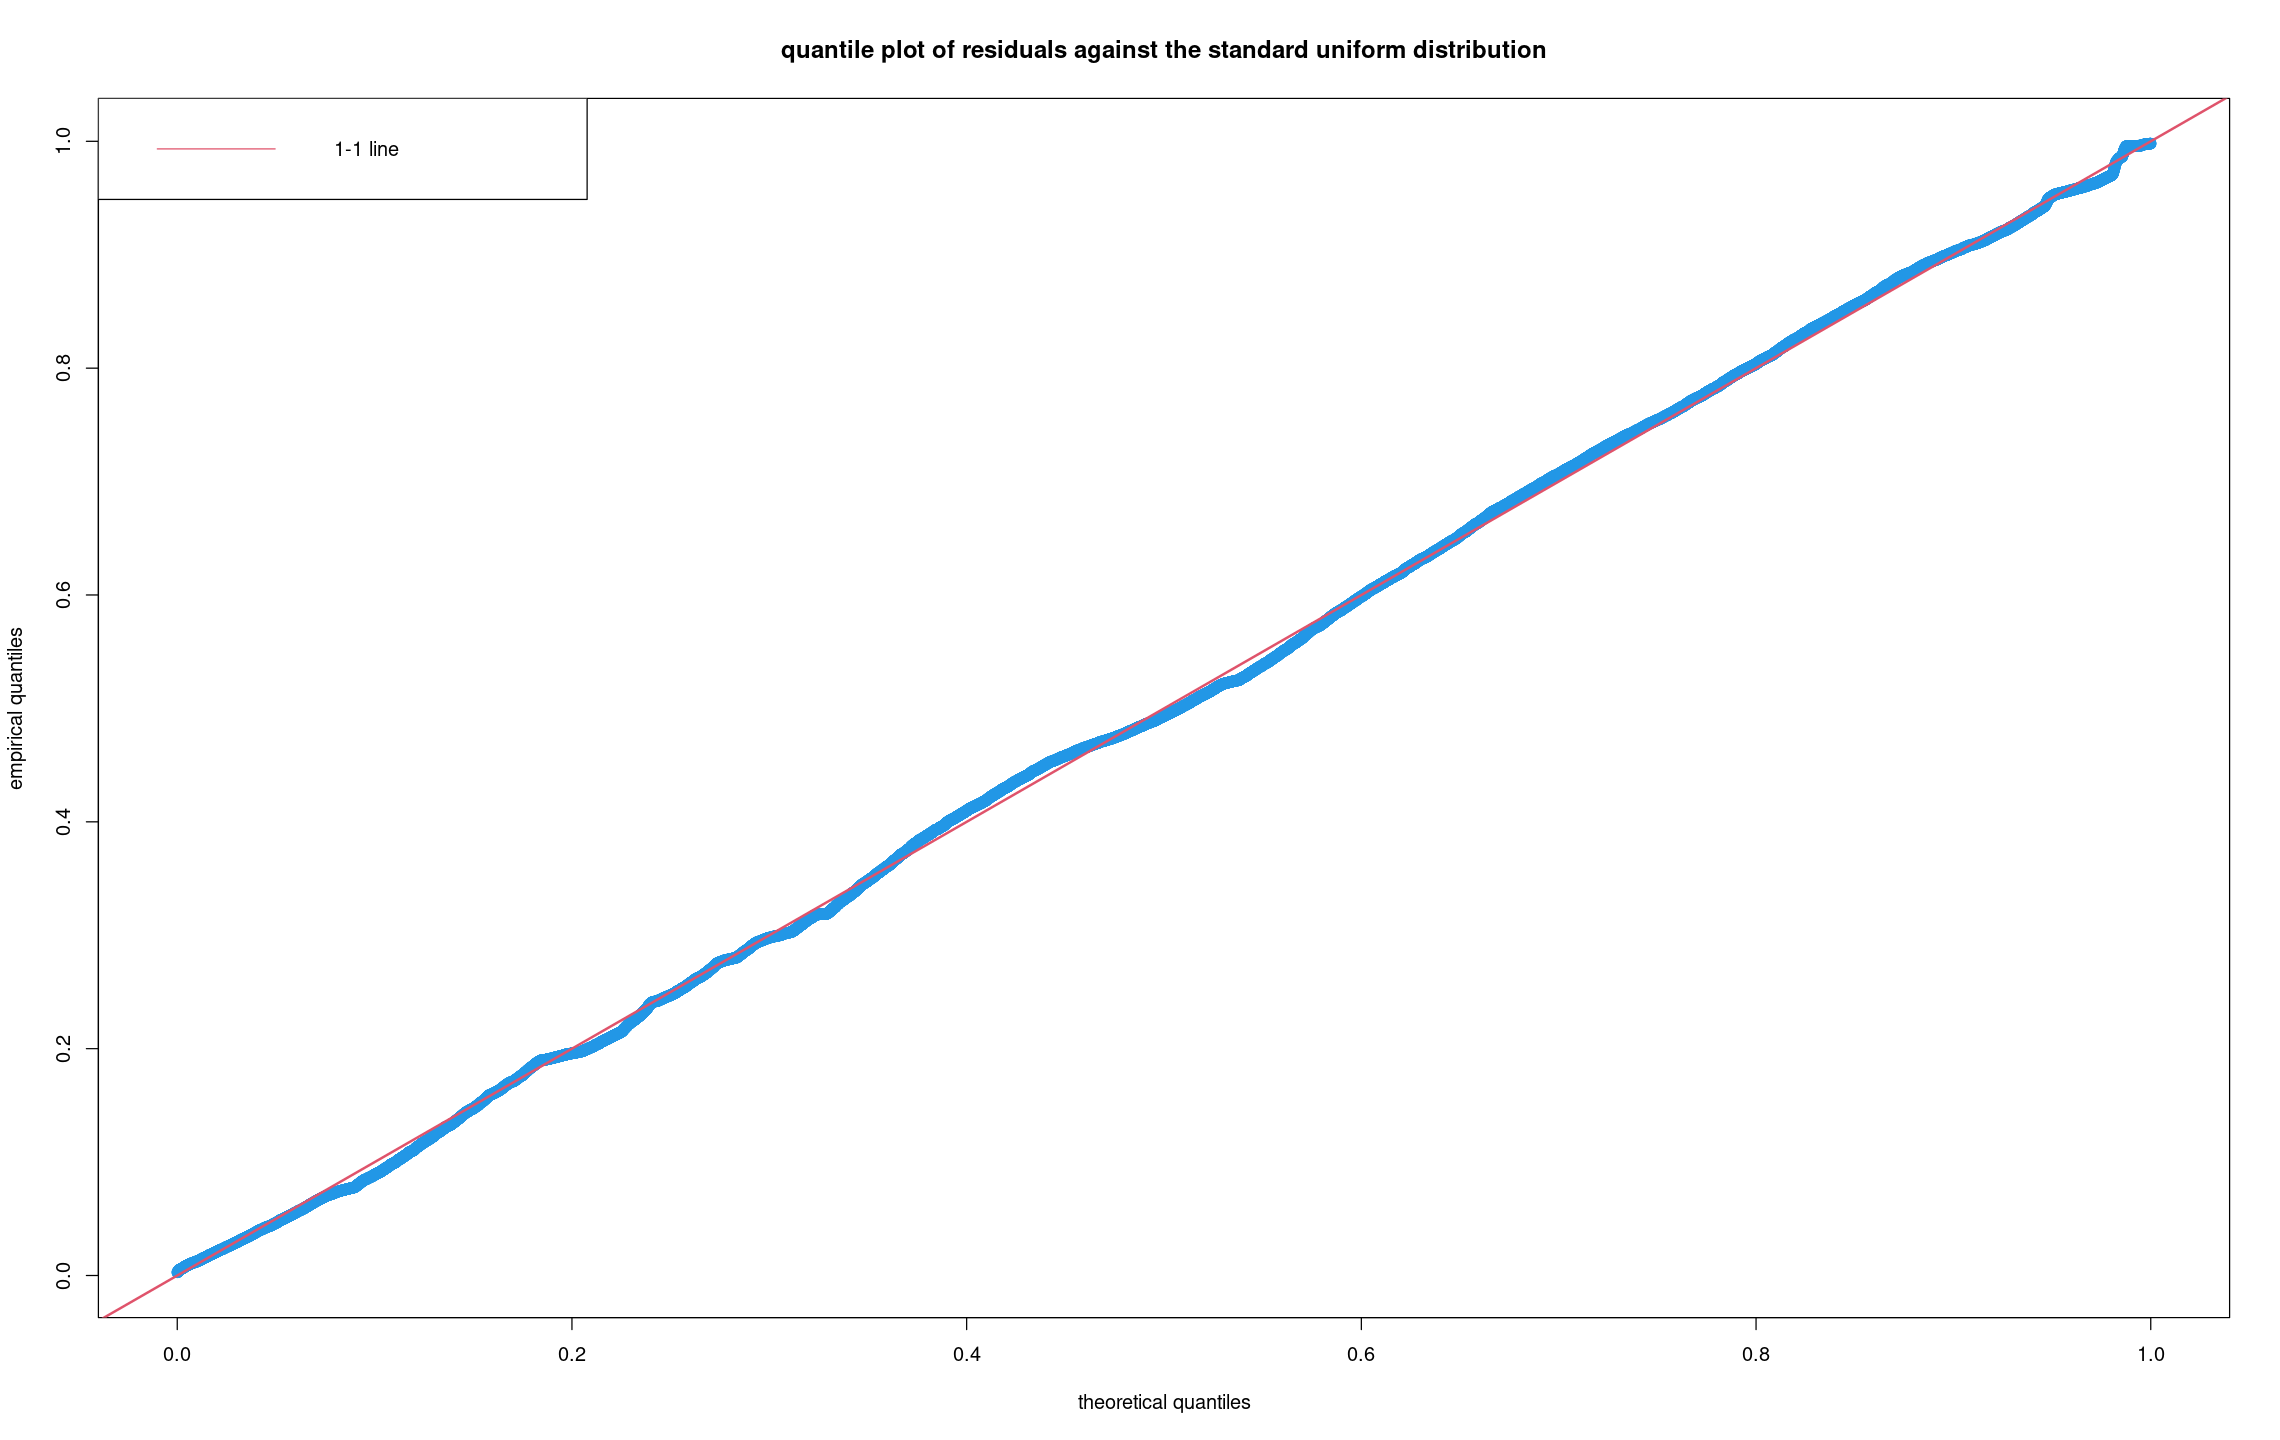

In [73]:
plot_fit_ns_gev_mixture_model(ns_gev_model, log_scale = FALSE)

In [74]:
ns_cdf <- get_full_ns_gev_mixture_model_cdf(ns_gev_model, kind = c("geometric", "arithmetic")[2])

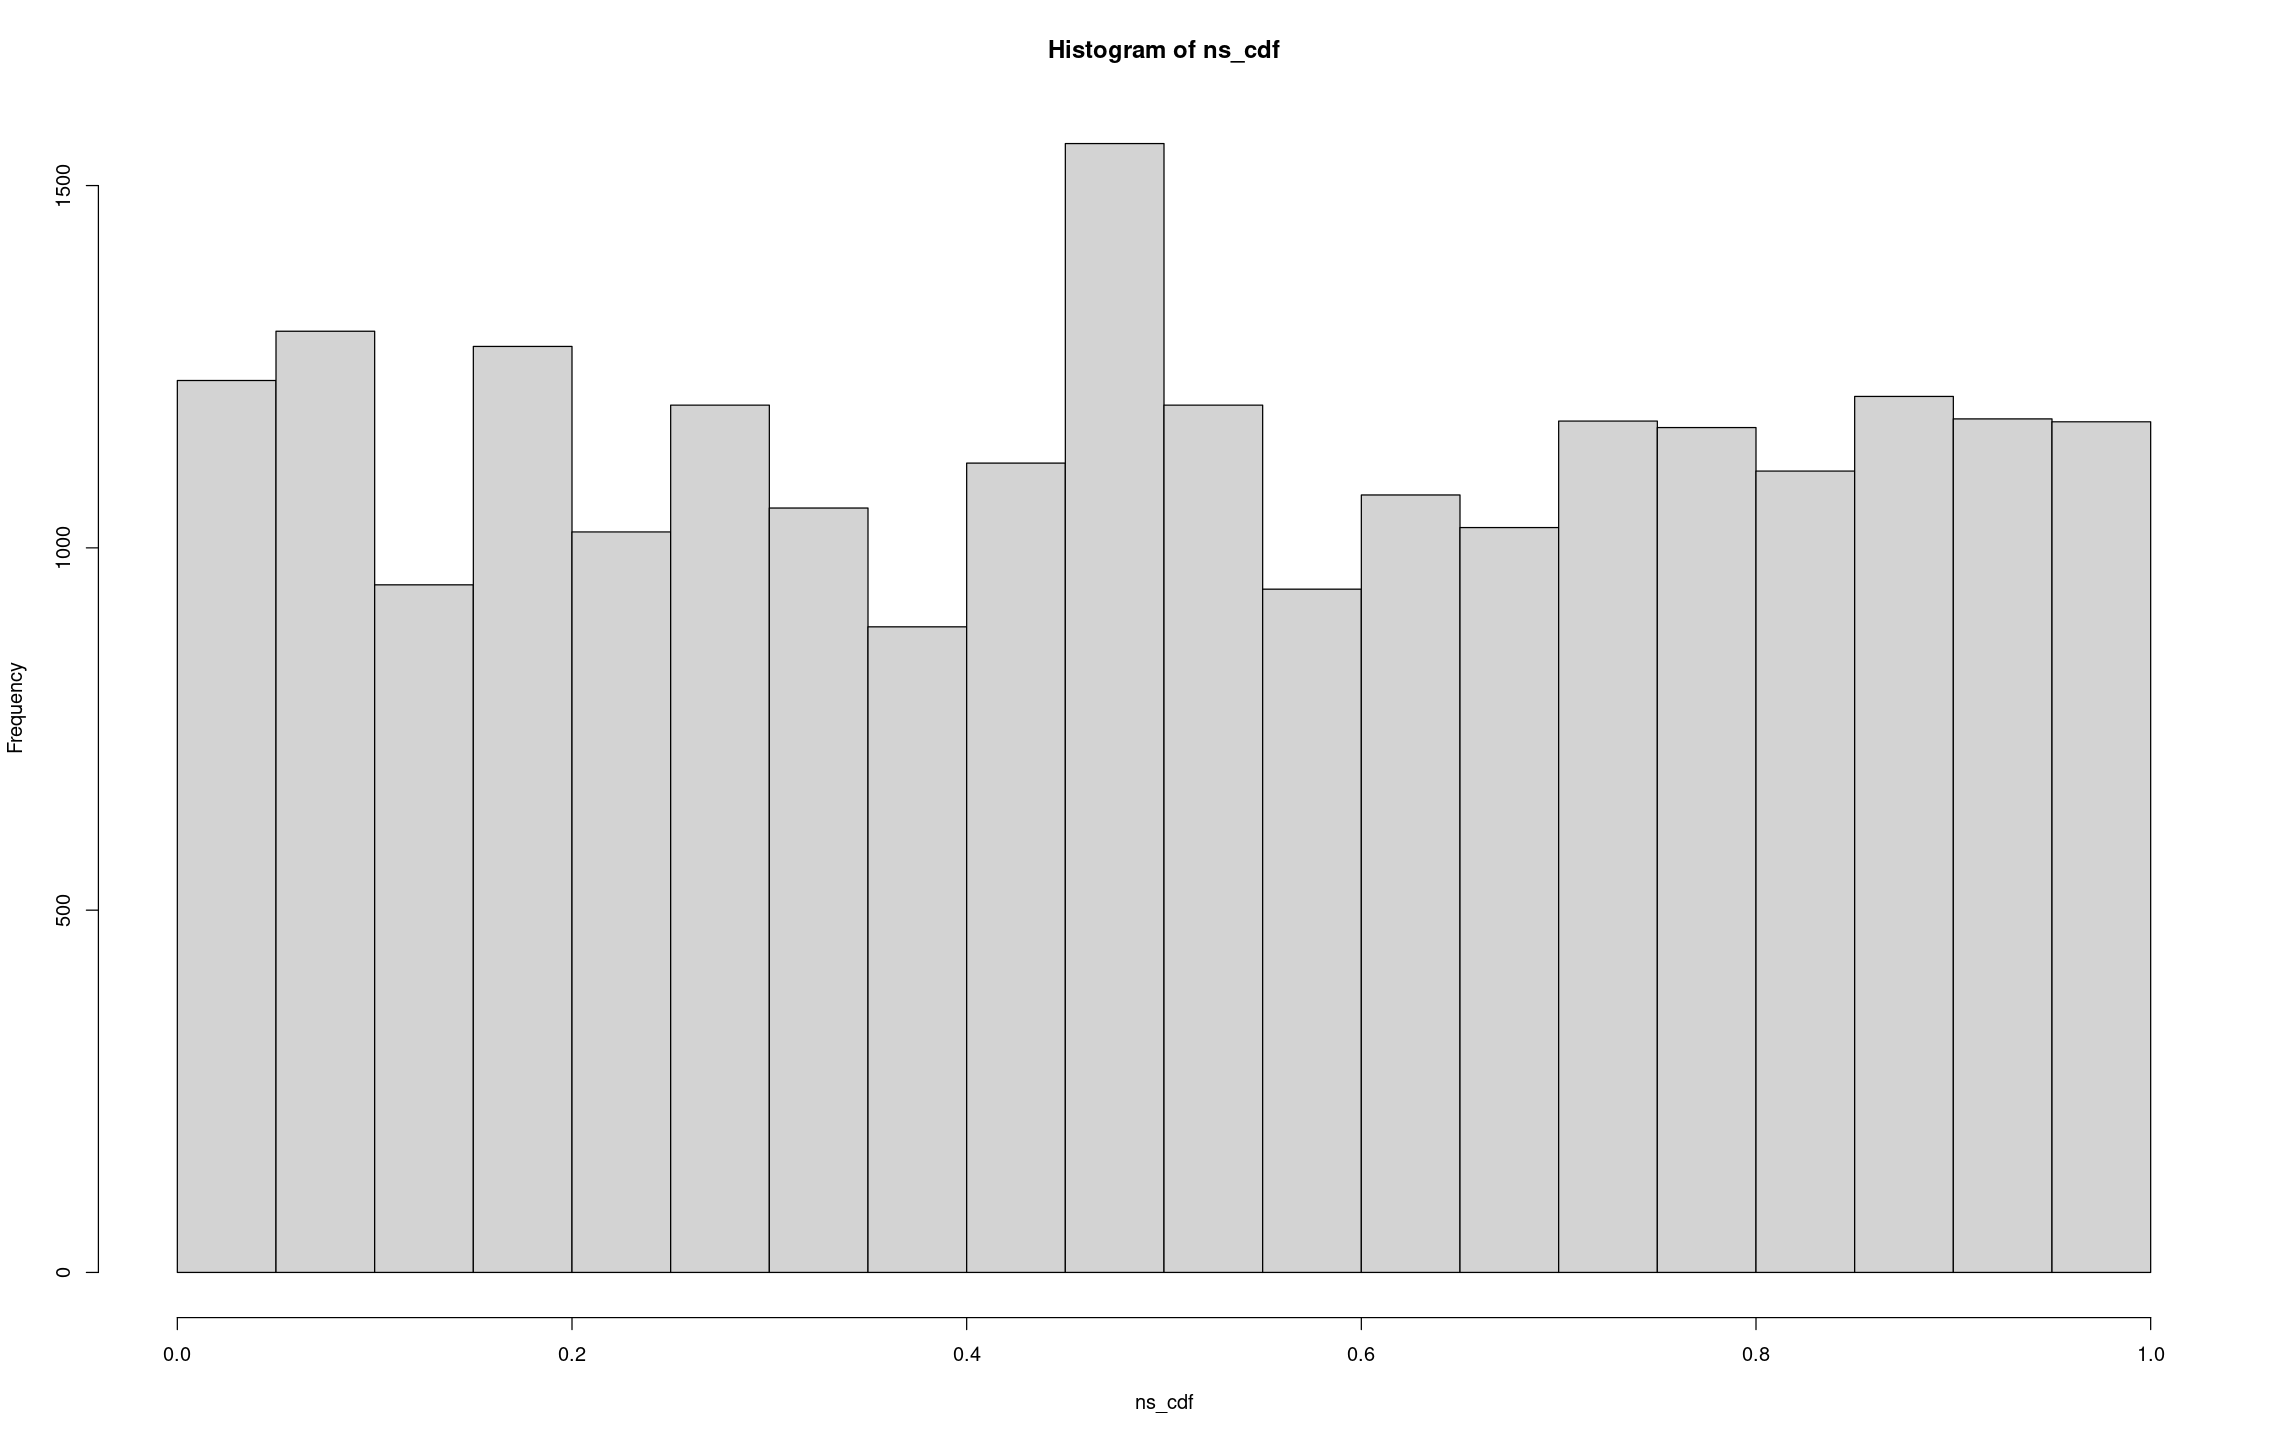

In [75]:
hist(ns_cdf)

## Quantiles

In [154]:
tail(data_covariates)

velocity_latitude,velocity_longitude,velocity,area,object
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-1.940983719e-12,7.435616186e-13,2.078533541e-12,0.5983367151,17
-1.363411577e-12,5.330692871e-13,1.463917345e-12,0.5661612699,18
-1.173312364e-12,4.772723125e-13,1.266669161e-12,0.6322046775,20
-1.267666481e-12,5.446311827e-13,1.379710634e-12,0.6057293744,20
-6.827273381e-13,3.380506526e-13,7.618365060e-13,0.6087681255,20
-4.829062301e-13,3.187162538e-13,5.786004473e-13,0.5587587651,20


In [145]:
new_data_covariates <- data.frame(velocity_latitude = -7*10^(-12),
                       velocity_longitude = 5*10^(-13),
                       velocity = 10^(-12),
                       area = 0.8,
                       object = 20)

new_data_covariates

velocity_latitude,velocity_longitude,velocity,area,object
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-7e-12,5e-13,1e-12,0.8,20


In [146]:
new_data_covariates_scaled <- get_standard_scaled_data(data_covariates, newdata = new_data_covariates)
new_data_covariates_scaled

velocity_latitude,velocity_longitude,velocity,area,object
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-0.1478147599,0.002268874779,-1.613184706,-0.3575051775,-1.21332676


In [178]:
ns_parameters <- sapply(cluster_models, function(model){
    get_ns_gev_model_parameters(model, new_data_covariates_scaled)
})

print(ns_parameters)

         [,1]          [,2]        
location 0.08254304664 0.4114384448
scale    0.07867626387 0.1839108172
shape    -0.3779014387 0.4985605364


In [179]:
ns_weights <- ns_gev_model$cluster_weights
print(ns_weights)

[1] 0.4795587849 0.5204412151


In [182]:
alpha <- 10^(-14)

In [183]:
rl_geometric <- calculate_gev_mixture_model_inverse_cdf(p = 1 - alpha,
                                                   locations = as.numeric(ns_parameters["location", ]),
                                                   scales = as.numeric(ns_parameters["scale", ]),
                                                   shapes = as.numeric(ns_parameters["shape", ]),
                                                   weights = ns_weights,
                                                   iterations = 100,
                                                   kind = c("geometric", "arithmetic")[1])

print(rl_geometric)

[1] 2539755.252


In [184]:
rl_arithmetic <- calculate_gev_mixture_model_inverse_cdf(p = 1 - alpha,
                                                   locations = as.numeric(ns_parameters["location", ]),
                                                   scales = as.numeric(ns_parameters["scale", ]),
                                                   shapes = as.numeric(ns_parameters["shape", ]),
                                                   weights = ns_weights,
                                                   iterations = 100,
                                                   kind = c("geometric", "arithmetic")[2])

print(rl_arithmetic)

[1] 2539755.252
